In [3]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import math
import random
import scipy
import seaborn as sns
import sklearn.manifold
from math import floor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('BitcoinHeistData.csv')
df=data.drop('address',axis=1)
# df = data
print((df))

         year  day  length     weight  count  looped  neighbors        income  \
0        2017   11      18   0.008333      1       0          2  1.000500e+08   
1        2016  132      44   0.000244      1       0          1  1.000000e+08   
2        2016  246       0   1.000000      1       0          2  2.000000e+08   
3        2016  322      72   0.003906      1       0          2  7.120000e+07   
4        2016  238     144   0.072848    456       0          1  2.000000e+08   
...       ...  ...     ...        ...    ...     ...        ...           ...   
2916692  2018  330       0   0.111111      1       0          1  1.255809e+09   
2916693  2018  330       0   1.000000      1       0          1  4.409699e+07   
2916694  2018  330       2  12.000000      6       6         35  2.398267e+09   
2916695  2018  330       0   0.500000      1       0          1  1.780427e+08   
2916696  2018  330     144   0.073972   6800       0          2  1.123500e+08   

                   label  


In [5]:
train_data=pd.DataFrame()
test_data= pd.DataFrame()
validation_data=pd.DataFrame()
data_size = df.shape[0]
data = df.sample(frac=1)
train_data= pd.DataFrame(data.iloc[0:floor(data_size*0.7)])
test_data = pd.DataFrame(data.iloc[floor(data_size*0.7):floor(data_size*0.85)])
validation_data=pd.DataFrame(data.iloc[floor(data_size*0.85)::])
# print(test_data['label'])

# print(train_data.size)
# print(test_data.size)
# print(validation_data.size)
# print(train_data.size+test_data.size+validation_data.size)



In [19]:
# Decision tree clf

def GINI_DT(i):
    clf_gini = DecisionTreeClassifier(criterion="gini",max_depth=i ,random_state=0)
    clf_gini.fit(train_data.loc[:,train_data.columns!='label'] ,train_data['label'].copy())
    # predicted = clf_gini.predict(test_data.loc[:,test_data.columns!='label'])
    predicted = clf_gini.predict(validation_data.loc[:,validation_data.columns!='label'])

    # score = accuracy_score(test_data['label'].copy(),predicted)
    score= accuracy_score(validation_data['label'].copy(),predicted)    
    print("Gini accuracy score :"+ str(score) + " for depth : "+str(i))
    return score
def ENTROPY_DT(i):
    clf_gini = DecisionTreeClassifier(criterion="entropy",max_depth=i ,random_state=0)
    clf_gini.fit(train_data.loc[:,train_data.columns!='label'],train_data['label'].copy())
    # predicted = clf_gini.predict(test_data.loc[:,test_data.columns!='label'])
    predicted = clf_gini.predict(validation_data.loc[:,validation_data.columns!='label'])

    # score = accuracy_score(test_data['label'].copy(),predicted)
    score= accuracy_score(validation_data['label'].copy(),predicted)
    print("Entropy accuracy score :"+ str(score) + " for depth : "+str(i))
    return score    

In [21]:
gini_scores=[]
entropy_scores=[]
depths = [4,8,10,15,20]
for k in depths:
    # print(GINI_DT(k))
    gini_scores.append(GINI_DT(k))

for k in depths:
    entropy_scores.append(ENTROPY_DT(k))

# max(max(gini_scores.values()),max(entropy_scores.values()))
# GINI with depth 15 is the most accurate

Gini accuracy score :0.9859727317402087 for depth : 4
Gini accuracy score :0.9865944389206981 for depth : 8
Gini accuracy score :0.9871544325207712 for depth : 10
Gini accuracy score :0.9881624210009029 for depth : 15
Gini accuracy score :0.986861864435835 for depth : 20
Entropy accuracy score :0.9859727317402087 for depth : 4
Entropy accuracy score :0.9862378715671821 for depth : 8
Entropy accuracy score :0.9874264294122352 for depth : 10
Entropy accuracy score :0.9882858481617353 for depth : 15
Entropy accuracy score :0.9863498702871967 for depth : 20


[0.9855658792470943, 0.9861761579867658, 0.9867864367264374, 0.9878607101633124, 0.98644815487823]
[0.9855658792470943, 0.9857898766871236, 0.9870127198546302, 0.9878241391526954, 0.9861555867932937]
Gini accuracy score :0.9855658792470943 for depth : 4
Gini accuracy score :0.9861761579867658 for depth : 8
Gini accuracy score :0.9867864367264374 for depth : 10
Gini accuracy score :0.9878607101633124 for depth : 15
Gini accuracy score :0.98644815487823 for depth : 20


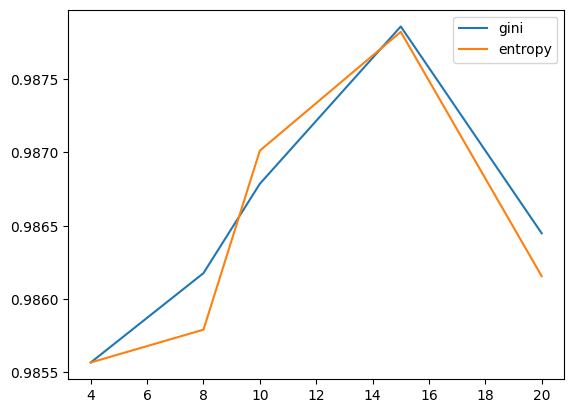

In [ ]:
# print(gini_scores)
# print(entropy_scores)
for i in range(len(depths)):
    print("Gini accuracy score :"+ str(gini_scores[i]) + " for depth : "+str(depths[i]))
plt.plot(depths,gini_scores,label='gini')
plt.plot(depths,entropy_scores,label='entropy')
plt.legend()
plt.show()

In [26]:
def StumpModel():
    clf = DecisionTreeClassifier(criterion="gini",max_depth=3 ,random_state=0)
    data = train_data.sample(frac=0.5)
    clf.fit(data.loc[:,data.columns!='label'] ,data['label'].copy())
    # predictions = clf.predict(test_data.loc[:,test_data.columns!='label'])
    predictions = clf.predict(validation_data.loc[:,validation_data.columns!='label'])

    return predictions    
    

In [29]:
# run 100 stump models , use the predictions array from each one
# get the mode of the labels for every x in input X
final_predictions_array=[]
final_predictions=[]
for i in range(0,100): # this 2 should be 100
    final_predictions_array.append( StumpModel().tolist())

for x in range(test_data.shape[0]):
    popular_prediction=''
    predictions_across_models=[]
    for m in range(len(final_predictions_array)):
        predictions_across_models.append(final_predictions_array[m][x])
    popular_prediction= max(predictions_across_models,key=predictions_across_models.count)
    # at this point we have the prediction for a xth test input that was voted on by the 100 models 
    final_predictions.append(popular_prediction)
    # added that prediction to the final predictions
final_predictions=np.array(final_predictions)
# accuracy = accuracy_score(test_data['label'].copy(),final_predictions)
accuracy = accuracy_score(validation_data['label'].copy(),final_predictions)

print(accuracy)
# print(final_predictions_array[1])
# for i in range(test_data.shape[0]):
#     max(final_predictions_array)


0.9859727317402087


In [24]:
from sklearn.ensemble import AdaBoostClassifier

def AdaBoost(i):
    ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion="gini",max_depth=15), n_estimators=i)
    ada_clf.fit(train_data.loc[:,train_data.columns!='label'] ,train_data['label'].copy())
    predicted = ada_clf.predict(test_data.loc[:,test_data.columns!='label'])
    score = accuracy_score(test_data['label'].copy(),predicted)
    print("Adaboost classifier accuracy score :"+ str(score) + " for no of classifiers : "+str(i))

In [25]:
for k in [4,8,10,15,20]:
    AdaBoost(k)

Adaboost classifier accuracy score :0.9696757751339985 for no of classifiers : 4
Adaboost classifier accuracy score :0.9782996765751248 for no of classifiers : 8
Adaboost classifier accuracy score :0.9783728185963589 for no of classifiers : 10
Adaboost classifier accuracy score :0.9816824950571994 for no of classifiers : 15
Adaboost classifier accuracy score :0.9837716140386967 for no of classifiers : 20
